In [ ]:
# ==============================
# 1) Setup and imports
# ==============================
!pip install -q scikit-learn nltk matplotlib joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import joblib

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# ==============================
# 2) Upload the Dataset to Colab
# ==============================
from google.colab import files
uploaded = files.upload()

# Make sure the file is named exactly: IMDB Dataset.csv


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
# ==============================
# 3) Load and preview data
# ==============================
df = pd.read_csv('IMDB Dataset.csv')

print("Rows:", len(df))
df.head()


Rows: 50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# ==============================
# 4) Basic checks
# ==============================
print("Columns:", df.columns.to_list())

# Drop rows with missing values
df = df.dropna(subset=['review', 'sentiment'])

# Check distribution
df['sentiment'].value_counts()


Columns: ['review', 'sentiment']


,count
sentiment,
positive,25000
negative,25000


In [ ]:
# ==============================
# 5) Text preprocessing functions
# ==============================
english_stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    """
    Clean text by:
      - removing HTML tags
      - lowercasing
      - removing non-letters
      - removing stopwords
      - stemming
    """
    text = re.sub(r'<.*?>', ' ', str(text))     # remove HTML tags
    text = text.lower()
    text = re.sub(r'[^a-z]+', ' ', text)
    tokens = text.split()
    cleaned = [stemmer.stem(t) for t in tokens if t not in english_stopwords]
    return ' '.join(cleaned)


In [ ]:
# ==============================
# 6) Apply preprocessing
# ==============================
df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review', 'sentiment']].head(3)


,review,clean_review,sentiment
0,One of the other reviewers has mentioned that ...,one review mention watch oz episod hook right ...,positive
1,A wonderful little production. <br /><br />The...,wonder littl product film techniqu unassum old...,positive
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...,positive


In [ ]:
# ==============================
# 7) Train/validation split
# ==============================
X = df['clean_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)


(40000, 10000)

In [ ]:
# ==============================
# 8) TF-IDF Vectorization
# ==============================
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape


((40000, 20000), (10000, 20000))

In [ ]:
# ==============================
# 9) Train two models and compare
# ==============================
# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_vec, y_train)

# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_vec)
y_pred_nb = nb.predict(X_test_vec)

# Accuracy
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"Logistic Regression Accuracy: {acc_logreg:.4f}")
print(f"MultinomialNB Accuracy:      {acc_nb:.4f}")


Logistic Regression Accuracy: 0.8980
MultinomialNB Accuracy:      0.8736


In [ ]:
# ==============================
# 10) Reports
# ==============================
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_logreg, target_names=['negative', 'positive']))

print("=== MultinomialNB Report ===")
print(classification_report(y_test, y_pred_nb, target_names=['negative', 'positive']))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

=== MultinomialNB Report ===
              precision    recall  f1-score   support

    negative       0.89      0.85      0.87      5000
    positive       0.86      0.89      0.88      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



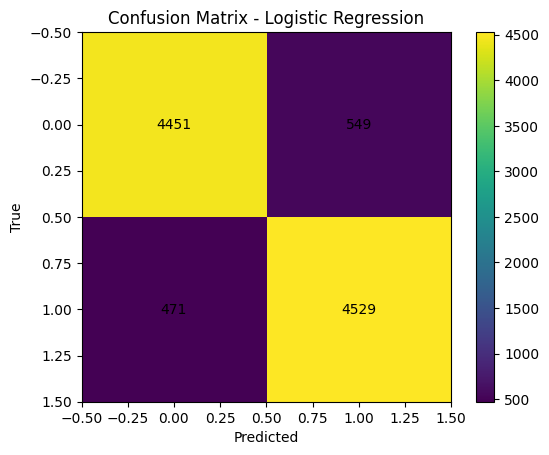

In [ ]:
# ==============================
# 11) Confusion Matrix - Logistic Regression
# ==============================
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure()
plt.imshow(cm_logreg, interpolation='nearest')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for (i, j), val in np.ndenumerate(cm_logreg):
    plt.text(j, i, int(val), ha='center', va='center')
plt.show()


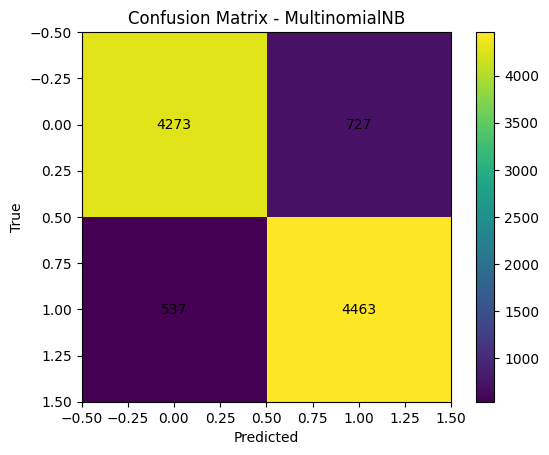

In [ ]:
# ==============================
# 12) Confusion Matrix - Naive Bayes
# ==============================
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure()
plt.imshow(cm_nb, interpolation='nearest')
plt.title("Confusion Matrix - MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for (i, j), val in np.ndenumerate(cm_nb):
    plt.text(j, i, int(val), ha='center', va='center')
plt.show()


In [ ]:
# ==============================
# 13) Save best model + vectorizer
# ==============================
best_model = logreg if acc_logreg >= acc_nb else nb

joblib.dump(best_model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

from google.colab import files
files.download('model.pkl')
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==============================
# 14) Inference helper
# ==============================
def predict_sentiment(raw_text):
    txt = clean_text(raw_text)
    vec = vectorizer.transform([txt])
    pred = best_model.predict(vec)[0]
    return int(pred)  # 0 = negative, 1 = positive

sample = "I loved this movie! It was fantastic and well-acted."
print("Prediction for sample:", predict_sentiment(sample))


Prediction for sample: 1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-08-16 17:05:08.887 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 17:05:08.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 17:05:08.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 17:05:08.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 17:05:08.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 17:05:08.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 17:05:08.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.